In [29]:
#import packages
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [3]:
# read in file and create dataframe
df = pd.read_csv('advance_tape.csv')

Please analyze the data and provide us insights about our advance originations and
performance data. Produce a light report on your findings.
Here are examples of questions we are looking for within the data:
1. Default rates by loan amount
2. Advance originations by different segmentations

## Inspect Data

In [4]:
df.head(10)

,user_id,id,origination_date,amount,banks,location_state,default_flag,pay_frequency
0,00005d618,dab032b8f,2018-09-18,170,Citi,NY,1,Monthly
1,00005d618,ef2879a5d,2018-04-27,130,Wells,TX,0,Irregular
2,0000759ff,8739db27d,2018-04-26,170,Chime,FL,0,Irregular
3,0000759ff,4d27ee400,2018-11-02,140,Wells,GA,0,Irregular
4,0000759ff,18e3eb77d,2018-09-01,170,Chase,CA,0,Monthly
5,000092b1c,0ff223e62,2018-07-18,150,Wells,CA,0,Irregular
6,000092b1c,d4e023bab,2018-11-27,120,Chime,FL,0,Weekly
7,000092b1c,375b599a5,2018-08-18,180,Chase,NY,0,Weekly
8,000092b1c,cdaa1c0bc,2018-06-03,200,Wells,FL,1,Irregular
9,000092b1c,cfa53eb7f,2018-12-16,240,Chase,FL,0,Monthly


### Features:
● User_id - Identifier for users
● Id - Unique identifier for advances
● Origination Date- Date of Advance Origination
● Amount - Origination Amount
● Location_State - State of Origination of Advance
● Banks - Bank of Borrower’s Depository Account
● Pay Frequency - Frequency of borrowers paycheck
● Default Flag - Advance has defaulted (Not repaid advance)

In [5]:
df.shape

(302866, 8)

There are 302,866 unique advances and 8 features in this dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302866 entries, 0 to 302865
Data columns (total 8 columns):
user_id             302866 non-null object
id                  302866 non-null object
origination_date    302866 non-null object
amount              302866 non-null int64
banks               302866 non-null object
location_state      302866 non-null object
default_flag        302866 non-null int64
pay_frequency       302866 non-null object
dtypes: int64(2), object(6)
memory usage: 18.5+ MB


In [7]:
df.describe()

,amount,default_flag
count,302866.000000,302866.000000
mean,160.166212,0.179142
std,48.944875,0.383472
min,80.000000,0.000000
25%,120.000000,0.000000
50%,160.000000,0.000000
75%,200.000000,0.000000
max,240.000000,1.000000


In [8]:
# check for any null values
df.isnull().sum()

user_id             0
id                  0
origination_date    0
amount              0
banks               0
location_state      0
default_flag        0
pay_frequency       0
dtype: int64

In [9]:
# convert origination_date to datetime
df['origination_date'] = pd.to_datetime(df['origination_date'])

In [21]:
# number of defaults and default percentage
print(df['default_flag'].value_counts())
print('Default Percentage: ' + (str(round(df['default_flag'].mean()*100, 2))))

0    248610
1     54256
Name: default_flag, dtype: int64
Default Percentage: 17.91


In [11]:
# Inspecting the unique values found in columns
df.nunique()

user_id              94009
id                  302866
origination_date       365
amount                  17
banks                    5
location_state           5
default_flag             2
pay_frequency            4
dtype: int64

In [159]:
len(df['id'].unique())

302866

In [12]:
# There are 94,009 individual users while there are 302,866 advances.

In [13]:
df['amount'].unique()

array([170, 130, 140, 150, 120, 180, 200, 240, 220, 110, 210, 230,  80,
       160, 190,  90, 100])

In [41]:
print(df['amount'].min())
print(df['amount'].max())

80
240


In [14]:
df['banks'].unique()

array(['Citi', 'Wells', 'Chime', 'Chase', 'Goliath'], dtype=object)

In [15]:
df['location_state'].unique()

array(['NY', 'TX', 'FL', 'GA', 'CA'], dtype=object)

In [16]:
df['pay_frequency'].unique()

array(['Monthly', 'Irregular', 'Weekly', 'Biweekly'], dtype=object)

In [149]:
# create function to calculate the default percentage based on bank/total defaults  
def def_by_bank(bank, df):
    banks = []
    for b in df[bank].unique():
        banks.append(str(b) + ' Default Percentage: ' + \
                     (str(round(((len(df[(df['default_flag'] == 1) & \
                                         (df['banks'] == b)]))/54256*100), 2))))
    return banks

# create function to calculate the default percentage based on amount/total defaults  
def def_by_amount(amount, df):
    amounts = []
    for a in df[amount].unique():
         amounts.append(str(a) + ' Loan Amount Default Percentage: ' + \
                        (str(round(((len(df[(df['default_flag'] == 1) & \
                                            (df['amount'] == a)]))/(len(df[df['default_flag'] == 1]))*100), 2))))
    return amounts

# create function to calculate the default percentage based on pay_frequency/total defaults  
def def_pay_freq(frequency, df):
    pay_freq = []
    for f in df[frequency].unique():
        pay_freq.append(str(f) + ' Default Percentage: ' + \
                        (str(round(((len(df[(df['default_flag'] == 1) & \
                                            (df['pay_frequency'] == f)]))/(len(df[df['default_flag'] == 1]))*100), 2))))
    return pay_freq

In [235]:
# create function to calculate the default percentage based on state/total defaults  
def by_state(state, df):
    state_def_of_total_def = []
    state_def_of_total_adv = []
    ratio_to_total_adv = []
    
    for s in df[state].unique():
        state_def_of_total_def.append(str(s) + ' Default Percentage Of Total Defaults: ' + \
                      (str(round(((len(df[(df['default_flag'] == 1) & \
                                          (df['location_state'] == s)]))/ (len(df[df['default_flag'] == 1]))*100), 2))))
        state_def_of_total_adv.append(str(s) + ' Default Percentage Of Total Advances: ' + \
                                     (str(round(((len(df[(df['default_flag'] == 1) & \
                                          (df['location_state'] == s)]))/ (len(df['id']))*100), 2))))
        ratio_to_total_adv.append(str(s) + ' Ratio Of Defaults To Total Advances: ' + \
                                  (str(len(df[(df['location_state'] == s) & \
                                          (df['default_flag'] == 1)])/(df['location_state'] == s).sum())))
    return state_def_of_total_def, state_def_of_total_adv, ratio_to_total_adv

In [236]:
by_state('location_state', df)

(['NY Default Percentage Of Total Defaults: 21.06',
  'TX Default Percentage Of Total Defaults: 27.79',
  'FL Default Percentage Of Total Defaults: 18.56',
  'GA Default Percentage Of Total Defaults: 9.32',
  'CA Default Percentage Of Total Defaults: 23.28'],
 ['NY Default Percentage Of Total Advances: 3.77',
  'TX Default Percentage Of Total Advances: 4.98',
  'FL Default Percentage Of Total Advances: 3.32',
  'GA Default Percentage Of Total Advances: 1.67',
  'CA Default Percentage Of Total Advances: 4.17'],
 ['NY Ratio Of Defaults To Total Advances: 0.25220193814706077',
  'TX Ratio Of Defaults To Total Advances: 0.16605730898839283',
  'FL Ratio Of Defaults To Total Advances: 0.166556389982466',
  'GA Ratio Of Defaults To Total Advances: 0.1674119712478055',
  'CA Ratio Of Defaults To Total Advances: 0.16591780965894162'])

In [205]:
(len(df[(df['location_state'] == 'TX') & (df['default_flag'] == 1)])/(df['location_state'] == 'TX').sum())

0.16605730898839283

In [218]:
len(df['id'])

302866

In [223]:
str(round(((len(df[(df['default_flag'] == 1) & (df['location_state'] == 'TX')]))/302866*100, 2)))

TypeError: type tuple doesn't define __round__ method

In [152]:
def_by_amount('amount', df)

['170 Loan Amount Default Percentage: 5.96',
 '130 Loan Amount Default Percentage: 5.77',
 '140 Loan Amount Default Percentage: 6.05',
 '150 Loan Amount Default Percentage: 5.97',
 '120 Loan Amount Default Percentage: 6.04',
 '180 Loan Amount Default Percentage: 5.88',
 '200 Loan Amount Default Percentage: 5.73',
 '240 Loan Amount Default Percentage: 5.72',
 '220 Loan Amount Default Percentage: 5.89',
 '110 Loan Amount Default Percentage: 5.74',
 '210 Loan Amount Default Percentage: 5.91',
 '230 Loan Amount Default Percentage: 6.12',
 '80 Loan Amount Default Percentage: 5.86',
 '160 Loan Amount Default Percentage: 5.88',
 '190 Loan Amount Default Percentage: 5.71',
 '90 Loan Amount Default Percentage: 5.79',
 '100 Loan Amount Default Percentage: 5.99']

In [153]:
def_by_bank('banks', df)

['Citi Default Percentage: 15.04',
 'Wells Default Percentage: 19.77',
 'Chime Default Percentage: 10.02',
 'Chase Default Percentage: 25.01',
 'Goliath Default Percentage: 30.17']

In [154]:
def_pay_freq('pay_frequency', df)

['Monthly Default Percentage: 19.73',
 'Irregular Default Percentage: 25.06',
 'Weekly Default Percentage: 30.0',
 'Biweekly Default Percentage: 25.21']

## Visualize Data

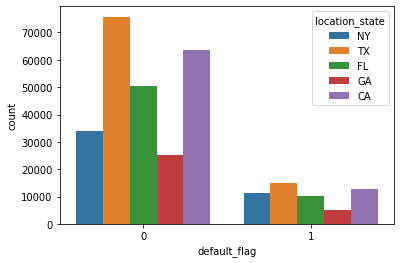

In [17]:
ax = sns.countplot(x="default_flag", hue="location_state", data=df)

In [27]:
df.groupby(["location_state", "default_flag"]).count()

user_id     id  origination_date  amount  banks  \
location_state default_flag                                                    
CA             0               63487  63487             63487   63487  63487   
               1               12629  12629             12629   12629  12629   
FL             0               50385  50385             50385   50385  50385   
               1               10069  10069             10069   10069  10069   
GA             0               25135  25135             25135   25135  25135   
               1                5054   5054              5054    5054   5054   
NY             0               33876  33876             33876   33876  33876   
               1               11425  11425             11425   11425  11425   
TX             0               75727  75727             75727   75727  75727   
               1               15079  15079             15079   15079  15079   

                             pay_frequency  
location_state default_flag                 
CA             0                     63487  
               1                     12629  
FL             0                     50385  
               1                     10069  
GA             0                     25135  
               1                      5054  
NY             0                     33876  
               1                     11425  
TX             0                     75727  
               1                     15079

In [49]:
df.groupby(["pay_frequency", "default_flag"]).count()

user_id     id  origination_date  amount  banks  \
pay_frequency default_flag                                                    
Biweekly      0               62311  62311             62311   62311  62311   
              1               13677  13677             13677   13677  13677   
Irregular     0               62260  62260             62260   62260  62260   
              1               13597  13597             13597   13597  13597   
Monthly       0               49613  49613             49613   49613  49613   
              1               10704  10704             10704   10704  10704   
Weekly        0               74426  74426             74426   74426  74426   
              1               16278  16278             16278   16278  16278   

                            location_state  
pay_frequency default_flag                  
Biweekly      0                      62311  
              1                      13677  
Irregular     0                      62260  
              1                      13597  
Monthly       0                      49613  
              1                      10704  
Weekly        0                      74426  
              1                      16278

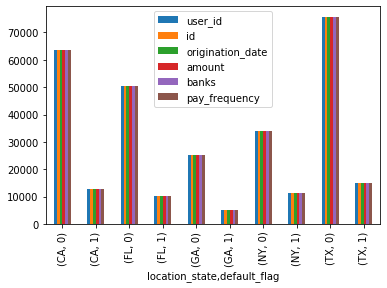

In [38]:
df.groupby(["location_state", "default_flag"]).count().plot(kind='bar')